In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [26]:
img = cv2.imread('sudoku.tif', 0)
img = cv2.resize(img,(0,0),fx=0.4,fy=0.4)
img = cv2.equalizeHist(img)

rows, cols = img.shape

In [27]:
def crop_topLeft():
    for i in range(rows):
        for j in range(cols):
            if img[i, j] != 255:
                return i, j

In [28]:
def crop_bottomRight():
    for i in range(rows-1, 0, -1):
        for j in range(cols-1, 0, -1):
            if img[i, j] != 255:
                return i, j  

479 479


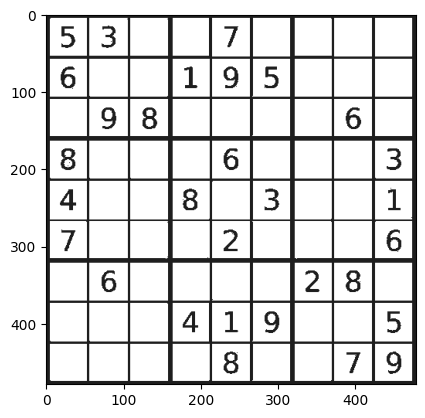

In [29]:
x1, y1= crop_topLeft()
x2, y2= crop_bottomRight()

sudoku = img[x1:x2, y1:y2]

width, height = sudoku.shape
print(width,height)
plt.imshow(sudoku, cmap='gray')

In [30]:
cell_width = width // 9
cell_height = height // 9

def count_none_white_pixels(img):
    rows, cols = img.shape
    row_10Percent = rows // 10
    col_10Percent = cols // 10
    count = 0
    for i in range(row_10Percent, rows-row_10Percent):
        for j in range(col_10Percent, cols-col_10Percent):
            if img[i, j] != 255:
                count += 1
    
    return count

In [31]:
cnt = 0
a = (cell_width * cell_height) / 35

for i in range(0, width, cell_width):
    for j in range(0, height, cell_height):
        small_img = sudoku[i:i+cell_width, j:j+cell_height]
        if small_img.shape == (cell_width, cell_height):
            if count_none_white_pixels(small_img) > a:
                cv2.imwrite(f'Output/cells/{cnt}.jpg', small_img)
                cnt += 1